In [86]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline




In [87]:
from sklearn.datasets import make_classification

X0, y = make_classification(n_features=1, n_redundant=0, n_informative=1, 
                            n_clusters_per_class=1, random_state=4)
X = sm.add_constant(X0)

In [88]:
# chisqprob 함수가 없다는 오류가 발생하면 다음 두 줄을 실행한다.
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

logit_mod = sm.Logit(y, X)
logit_res = logit_mod.fit(disp=0)
logit_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                          Logit   Df Residuals:                       98
Method:                           MLE   Df Model:                            1
Date:                Sat, 24 Mar 2018   Pseudo R-squ.:                  0.7679
Time:                        19:23:33   Log-Likelihood:                -16.084
converged:                       True   LL-Null:                       -69.295
                                        LLR p-value:                 5.963e-25
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2515      0.477      0.527      0.598      -0.683       1.186
x1             4.2382      0.902      4.699      0.000       2.470       6.006
==============================================================================
"""

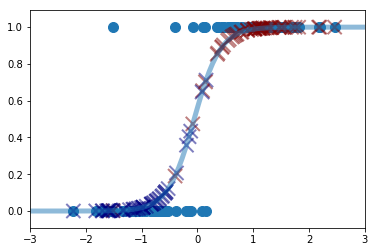

In [89]:
xx = np.linspace(-3, 3, 100)
sigmoid = logit_res.predict(sm.add_constant(xx))
plt.plot(xx, sigmoid, lw=5, alpha=0.5)
plt.scatter(X0, y, marker='o', s=100)
plt.scatter(X0, logit_res.predict(X), marker='x', c=y, s=200, lw=2, alpha=0.5, cmap=mpl.cm.jet)
plt.xlim(-3, 3)
plt.show()

In [90]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression().fit(X0, y)

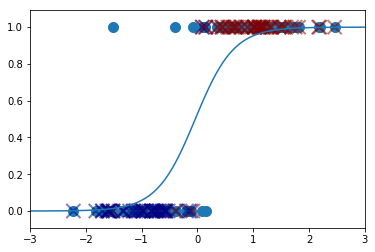

In [91]:
xx = np.linspace(-3, 3, 100)
sigm = 1.0/(1 + np.exp(-model.coef_[0][0]*xx - model.intercept_[0]))
plt.plot(xx, sigm)
plt.scatter(X0, y, marker='o', s=100)
plt.scatter(X0, model.predict(X0), marker='x', c=y, s=200, lw=2, alpha=0.5, cmap=mpl.cm.jet)
plt.xlim(-3, 3)
plt.show()

In [92]:
df = pd.read_csv("http://www.stat.tamu.edu/~sheather/book/docs/datasets/MichelinNY.csv", 
                 encoding="latin1")
df.tail()

,InMichelin,Restaurant Name,Food,Decor,Service,Price
159,0,Terrace in the Sky,23,25,21,62
160,1,Tocqueville,25,21,24,65
161,1,Triomphe,25,22,22,65
162,0,Village,20,20,19,40
163,1,Vong,23,24,21,60


In [93]:
df['InMichelin'].unique()

array([0, 1])

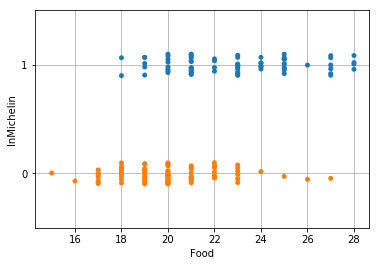

In [94]:
sns.stripplot(x="Food", y="InMichelin", data=df, jitter=True, orient='h', order=[1, 0])
plt.grid(True)
plt.show()

In [95]:
model = sm.Logit.from_formula("InMichelin ~ Food + Decor + Service + Price", df)
result = model.fit(disp=0)
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             InMichelin   No. Observations:                  164
Model:                          Logit   Df Residuals:                      159
Method:                           MLE   Df Model:                            4
Date:                Sat, 24 Mar 2018   Pseudo R-squ.:                  0.3428
Time:                        19:23:35   Log-Likelihood:                -74.198
converged:                       True   LL-Null:                       -112.89
                                        LLR p-value:                 6.213e-16
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -11.1975      2.309     -4.850      0.000     -15.723      -6.672
Food           0.4048      0.131      3.080      0.002       0.147       0.662
Decor          0.1000      0.089      1.121      0.262      -0.075       0.275
Service       -0.1924      0.124     -1.557      0.119      -0.435       0.050
Price          0.0917      0.032      2.889      0.004       0.029       0.154
==============================================================================
"""

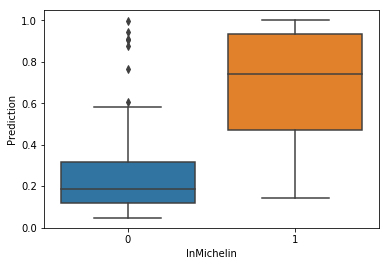

In [96]:
df["Prediction"] = result.predict(df)
sns.boxplot(x="InMichelin", y="Prediction", data=df)
plt.show()

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

In [98]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
sy = pd.Series(iris.target, dtype="category")
sy = sy.cat.rename_categories(iris.target_names)
df['species'] = sy
df1 = df[df['species'].isin(['setosa'])]
df2 = df[df['species'].isin(['versicolor'])]
iris_df = pd.concat([df1, df2])

df = pd.DataFrame(columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species'])

df['sepal_length'] = iris_df['sepal length (cm)']
df['sepal_width'] = iris_df['sepal width (cm)']
df['petal_length'] = iris_df['petal length (cm)']
df['petal_width'] = iris_df['petal width (cm)']
df['species'] = iris_df['species']

In [99]:
df['species'] = df['species'].apply(lambda x: 0 if x == 'setosa' else 1)

In [100]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [101]:
model = sm.Logit.from_formula("species ~ sepal_length", df)
result = model.fit(disp=0)
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                species   No. Observations:                  100
Model:                          Logit   Df Residuals:                       98
Method:                           MLE   Df Model:                            1
Date:                Sat, 24 Mar 2018   Pseudo R-squ.:                  0.5368
Time:                        19:23:41   Log-Likelihood:                -32.106
converged:                       True   LL-Null:                       -69.315
                                        LLR p-value:                 6.320e-18
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -27.8315      5.434     -5.122      0.000     -38.481     -17.182
sepal_length     5.1403      1.007      5.107      0.000       3.168       7.113
================================================================================
"""

In [102]:
df["Prediction"] = result.predict(df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])

In [103]:
df['Prediction'] = df['Prediction'].apply(lambda x: 1 if x >= 0.5 else 0)

In [104]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y, df["Prediction"]))

[[25 24]
 [26 25]]


In [105]:
from sklearn.metrics import classification_report
print(classification_report(y, df['Prediction']))

             precision    recall  f1-score   support

          0       0.49      0.51      0.50        49
          1       0.51      0.49      0.50        51

avg / total       0.50      0.50      0.50       100



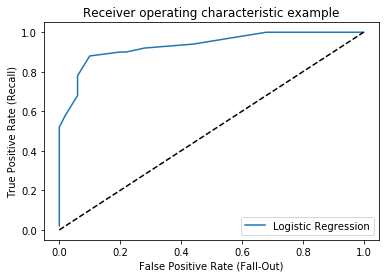

0.9326


In [107]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

fpr1, tpr1, thresholds1 = roc_curve(df['species'], result.predict(df))

plt.plot(fpr1, tpr1, label="Logistic Regression")
plt.legend()
plt.plot([0, 1], [0, 1], 'k--', label="random guess")
plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver operating characteristic example')
plt.show()

print(auc(fpr1, tpr1))

Versicolor VS Virginica

In [108]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
sy = pd.Series(iris.target, dtype="category")
sy = sy.cat.rename_categories(iris.target_names)
df['species'] = sy
df1 = df[df['species'].isin(['versicolor'])]
df2 = df[df['species'].isin(['virginica'])]
iris_df = pd.concat([df1, df2])

df = pd.DataFrame(columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species'])

df['sepal_length'] = iris_df['sepal length (cm)']
df['sepal_width'] = iris_df['sepal width (cm)']
df['petal_length'] = iris_df['petal length (cm)']
df['petal_width'] = iris_df['petal width (cm)']
df['species'] = iris_df['species']

In [109]:
df['species'] = df['species'].apply(lambda x: 0 if x == 'versicolor' else 1)

In [110]:
model = sm.Logit.from_formula("species ~ sepal_length + sepal_width + petal_length + petal_width", df)
result = model.fit(disp=0)
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                species   No. Observations:                  100
Model:                          Logit   Df Residuals:                       95
Method:                           MLE   Df Model:                            4
Date:                Sat, 24 Mar 2018   Pseudo R-squ.:                  0.9142
Time:                        19:24:45   Log-Likelihood:                -5.9493
converged:                       True   LL-Null:                       -69.315
                                        LLR p-value:                 1.947e-26
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -42.6378     25.708     -1.659      0.097     -93.024       7.748
sepal_length    -2.4652      2.394     -1.030      0.303      -7.158       2.228
sepal_width     -6.6809      4.480     -1.491      0.136     -15.461       2.099
petal_length     9.4294      4.737      1.990      0.047       0.145      18.714
petal_width     18.2861      9.743      1.877      0.061      -0.809      37.381
================================================================================

Possibly complete quasi-separation: A fraction 0.60 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [111]:
df["Prediction"] = result.predict(df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])

In [112]:
df['Prediction'] = df['Prediction'].apply(lambda x: 1 if x >= 0.5 else 0)

In [113]:
print(confusion_matrix(y, df['Prediction']))
print(classification_report(y, df['Prediction']))

[[25 24]
 [25 26]]
             precision    recall  f1-score   support

          0       0.50      0.51      0.51        49
          1       0.52      0.51      0.51        51

avg / total       0.51      0.51      0.51       100



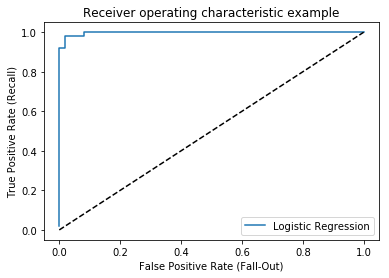

0.9972


In [114]:
fpr1, tpr1, thresholds1 = roc_curve(df['species'], result.predict(df))

plt.plot(fpr1, tpr1, label="Logistic Regression")
plt.legend()
plt.plot([0, 1], [0, 1], 'k--', label="random guess")
plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver operating characteristic example')
plt.show()

print(auc(fpr1, tpr1))

Setosa VS Virginica

In [ ]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
sy = pd.Series(iris.target, dtype="category")
sy = sy.cat.rename_categories(iris.target_names)
df['species'] = sy
df1 = df[df['species'].isin(['setosa'])]
df2 = df[df['species'].isin(['virginica'])]
iris_df = pd.concat([df1, df2])

df = pd.DataFrame(columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species'])

df['sepal_length'] = iris_df['sepal length (cm)']
df['sepal_width'] = iris_df['sepal width (cm)']
df['petal_length'] = iris_df['petal length (cm)']
df['petal_width'] = iris_df['petal width (cm)']
df['species'] = iris_df['species']
df = df.reset_index(drop=True)

In [ ]:
df['species'] = df['species'].apply(lambda x: 0 if x == 'setosa' else 1)

In [ ]:
df.head()

# QDA, LDA

In [3]:
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target, dtype="category")

In [8]:
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [4]:
from sklearn.preprocessing import label_binarize

In [5]:
y_bi = label_binarize(y, classes=[0, 1, 2])

# QDA & OneVsRest

In [10]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda = QuadraticDiscriminantAnalysis(store_covariance=True).fit(X, y)
model1 = qda.fit(X, y)

In [12]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print("confusion matrix : \n",
      confusion_matrix(y, model1.predict(X)), "\n")

print("classification report : \n",
      classification_report(y, model1.predict(X)))

confusion matrix : 
 [[50  0  0]
 [ 0 48  2]
 [ 0  1 49]] 

classification report : 
              precision    recall  f1-score   support

          0       1.00      1.00      1.00        50
          1       0.98      0.96      0.97        50
          2       0.96      0.98      0.97        50

avg / total       0.98      0.98      0.98       150



In [74]:
from sklearn.multiclass import OneVsRestClassifier
model2 = OneVsRestClassifier(qda).fit(X, y_bi)

In [75]:
from sklearn.metrics import roc_curve


fpr1, tpr1, thresholds1 = roc_curve(y_bi[:,0], model2.decision_function(X)[:,0])
fpr2, tpr2, thresholds2 = roc_curve(y_bi[:,1], model2.decision_function(X)[:,1])
fpr3, tpr3, thresholds3 = roc_curve(y_bi[:,2], model2.decision_function(X)[:,2])

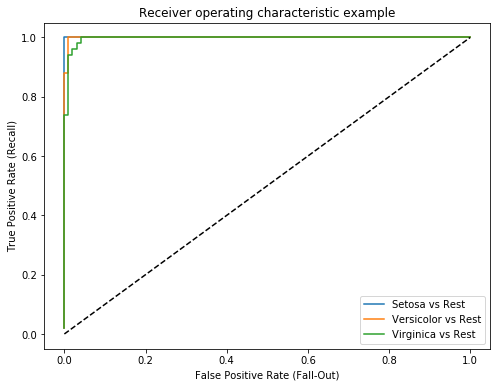

In [76]:
plt.figure(figsize=(8, 6))
plt.plot(fpr1, tpr1, label = "Setosa vs Rest")
plt.plot(fpr2, tpr2, label = "Versicolor vs Rest")
plt.plot(fpr3, tpr3, label = "Virginica vs Rest")
plt.legend()
plt.plot([0, 1], [0, 1], 'k--', label="random guess")
plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver operating characteristic example')
plt.show()


# LDA vs OneVsRest

In [66]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=3, solver="svd", store_covariance=True).fit(X, y)

In [67]:
model3 = lda.fit(X, y)

In [68]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print("confusion matrix : \n",
      confusion_matrix(y, model3.predict(X)), "\n")

print("classification report : \n",
      classification_report(y, model3.predict(X)))

confusion matrix : 
 [[50  0  0]
 [ 0 48  2]
 [ 0  1 49]] 

classification report : 
              precision    recall  f1-score   support

          0       1.00      1.00      1.00        50
          1       0.98      0.96      0.97        50
          2       0.96      0.98      0.97        50

avg / total       0.98      0.98      0.98       150



In [69]:
model4 = OneVsRestClassifier(lda).fit(X, y_bi)

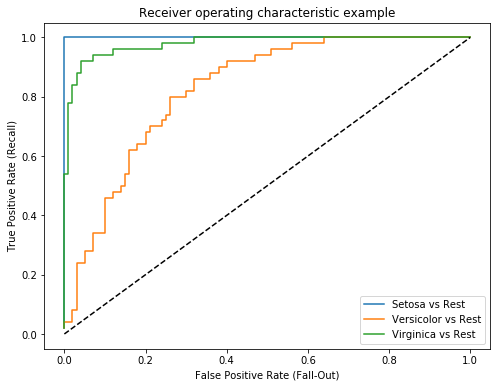

In [71]:
fpr1, tpr1, thresholds1 = roc_curve(y_bi[:,0], model4.decision_function(X)[:,0])
fpr2, tpr2, thresholds2 = roc_curve(y_bi[:,1], model4.decision_function(X)[:,1])
fpr3, tpr3, thresholds3 = roc_curve(y_bi[:,2], model4.decision_function(X)[:,2])

plt.figure(figsize=(8, 6))
plt.plot(fpr1, tpr1, label = "Setosa vs Rest")
plt.plot(fpr2, tpr2, label = "Versicolor vs Rest")
plt.plot(fpr3, tpr3, label = "Virginica vs Rest")
plt.legend()
plt.plot([0, 1], [0, 1], 'k--', label="random guess")
plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver operating characteristic example')
plt.show()